# Данные о фильмах и ТВ шоу на Netflix

Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем файл csv

In [ ]:
url = "https://raw.githubusercontent.com/Kate1900/Mashine-Learning-pr/main/csv/netflix_list.csv"
data_raw = pd.read_csv(url)

Выясним размер таблицы

In [ ]:
data_raw.shape

(7008, 19)

По результату, можем сказать, что таблица с нашими данными состоит из 7008 строк и 19 столбцов. Посмотрим, как она выглядит:

In [ ]:
data_raw

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,tt9777386,Merry Happy Whatever,"16,543",13,2019.0,NaN,NaN,28,tvEpisode,United States,English,When his daughter arrives home for the holiday...,When his daughter arrives home for the holiday...,6.1,221.0,Comedy,0,"['Dennis Quaid', 'Bridgit Mendler', 'Brent Mor...",https://m.media-amazon.com/images/M/MV5BOTc0ND...
7004,tt9790434,The Morning Show,"16,569",NaN,2019.0,NaN,NaN,30,tvEpisode,-,-,NaN,-,NaN,NaN,\N,0,"['Bounty Hunters Brothers', 'Bruce Lourie', 'C...",https://m.media-amazon.com/images/G/01/imdb/im...
7005,tt9817600,Losers,"16,599",16,2019.0,NaN,NaN,\N,tvEpisode,-,-,"The life of Michael Bentt, a champion boxer fo...","The life of Michael Bentt, a champion boxer fo...",8.0,221.0,"Documentary,Sport",0,"['Michael Bentt', 'Harold Perrineau', 'Mickey ...",https://m.media-amazon.com/images/M/MV5BOTY3Zj...
7006,tt9842922,Firefly Lane,"16,627",18,2021.0,NaN,NaN,51,tvEpisode,United States,English,Kate experiences the force of nature that is T...,Kate experiences the force of nature that is T...,7.3,380.0,"Drama,Romance",0,"['Katherine Heigl', 'Sarah Chalke', 'Ben Lawso...",https://m.media-amazon.com/images/M/MV5BODM3OW...


Посмотрим информацию о типах данных

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       7008 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

Признаки:
- `imdb_id` - уникальный id фильма или шоу
- `title` - название фильма или шоу
- `popular_rank`- ранжирование по популярности
- `certificate` - возрастные ограничения
- `startYear` - год начала выпуска     
- `endYear` - год окончания выпуска       
- `episodes` - число эпизодов (1 для фильмов)      
- `runtime` - длительность         
- `type` - тип (сериал или фильм)          
- `orign_country`  - страна производства
- `language`  - язык   
- `plot`  -    резюме шоу      
- `summary` -  краткое содержание       
- `rating`   -   средняя оценка  
- `numVotes`  -    количество голосов 
- `genres`   - к каким жанрам принадлежит     
- `isAdult` -  1 если есть материал для взрослых, 0 если нет      
- `cast` -   основной актерский состав       
- `image_url` - ссылка на постер

Признаки `popular_rank`, `startYear` , `episodes`, `rating`и `numVotes`  - количественные (числовые), `isAdult` - бинарный, остальные признаки - номинальные (категориальные).

In [ ]:
data_raw.describe()

,startYear,endYear,episodes,rating,numVotes,isAdult
count,6493.000000,1126.000000,2304.000000,6000.000000,6.000000e+03,7008.0
mean,2015.606653,2016.613677,38.510851,6.696400,1.961778e+04,0.0
std,7.855886,5.195806,237.894838,1.209824,7.975237e+04,0.0
min,1932.000000,1969.000000,1.000000,1.700000,5.000000e+00,0.0
25%,2015.000000,2016.000000,8.000000,6.000000,3.040000e+02,0.0
50%,2017.000000,2018.000000,14.000000,6.800000,1.312000e+03,0.0
75%,2019.000000,2019.000000,30.000000,7.600000,6.166750e+03,0.0
max,2022.000000,2022.000000,8358.000000,9.700000,1.697849e+06,0.0


Диаграмма зависимости признаков друг от друга

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


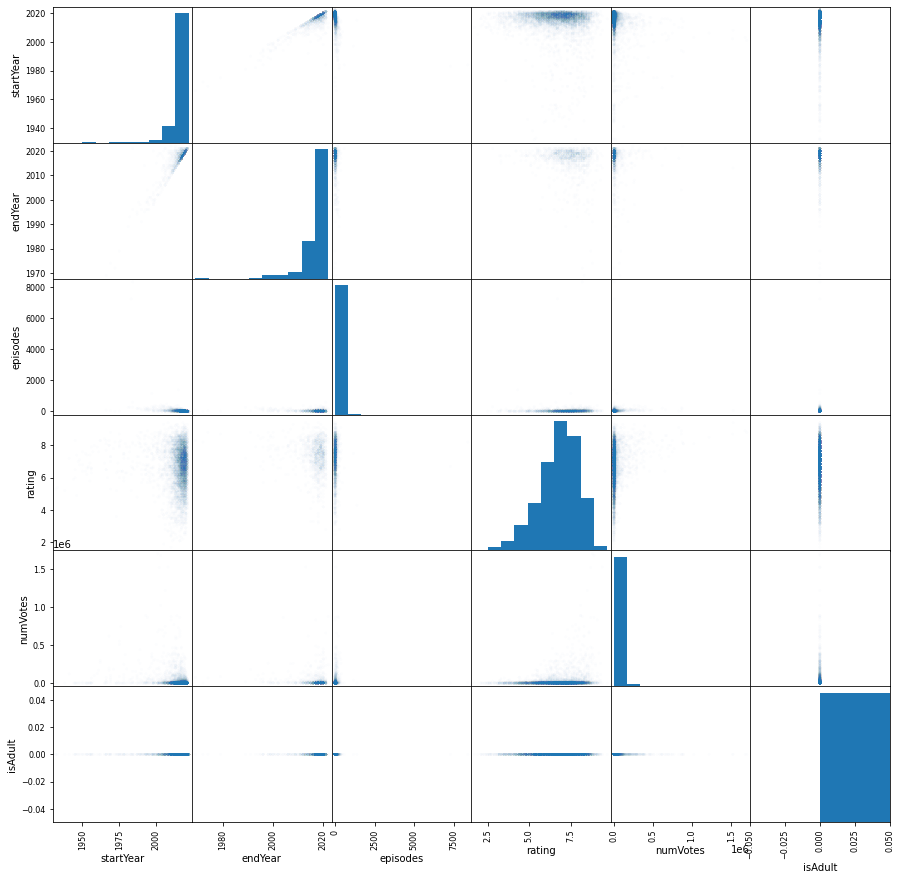

In [ ]:
from pandas.plotting import scatter_matrix
# scatter_matrix(data_raw, alpha = .8,marker='.', color='green', s=30 ,figsize = (10, 10))
scatter_matrix(data_raw, alpha = .01, figsize = (15, 15))
pass

Построим матрицу корреляции

In [ ]:
data_raw.corr()

,startYear,endYear,episodes,rating,numVotes,isAdult
startYear,1.000000,0.887641,-0.295582,-0.044088,-0.180321,NaN
endYear,0.887641,1.000000,-0.214214,-0.135554,-0.058113,NaN
episodes,-0.295582,-0.214214,1.000000,0.015027,0.048274,NaN
rating,-0.044088,-0.135554,0.015027,1.000000,0.165060,NaN
numVotes,-0.180321,-0.058113,0.048274,0.165060,1.000000,NaN
isAdult,NaN,NaN,NaN,NaN,NaN,NaN


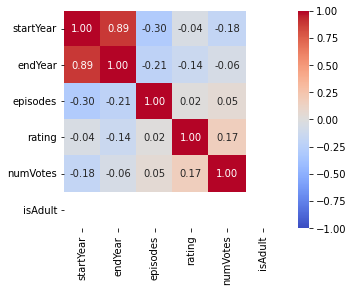

In [ ]:
sns.heatmap(data_raw.corr(),annot = True, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

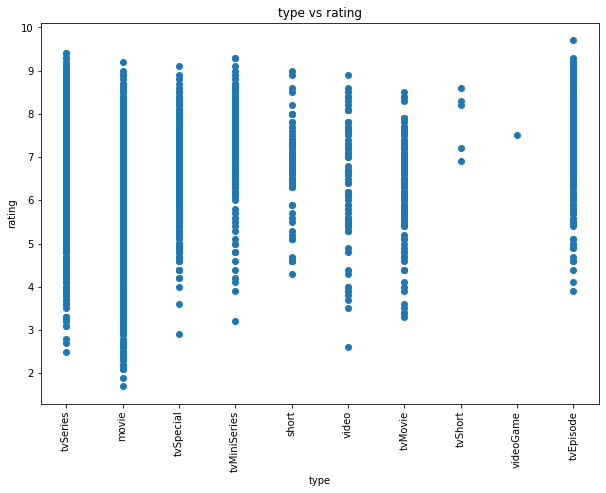

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_raw['type'].astype(str), data_raw['rating'],'o', alpha = 1)
plt.tick_params(axis='x',labelrotation = 90)
plt.xlabel('type')
plt.ylabel('rating')
plt.title('type vs rating')
pass

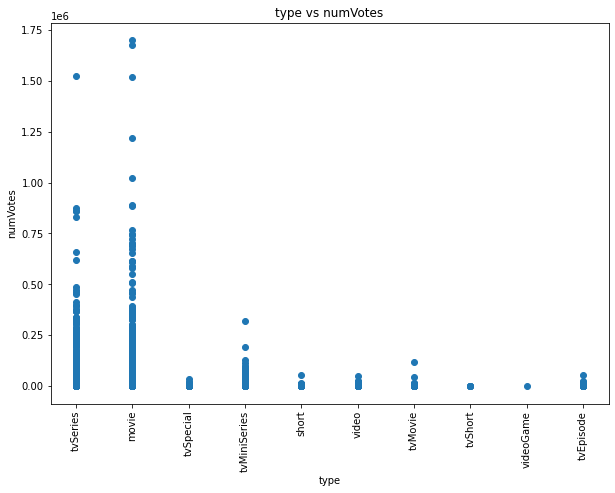

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_raw['type'].astype(str), data_raw['numVotes'],'o', alpha = 1)
plt.tick_params(axis='x',labelrotation = 90)
plt.xlabel('type')
plt.ylabel('numVotes')
plt.title('type vs numVotes')
pass

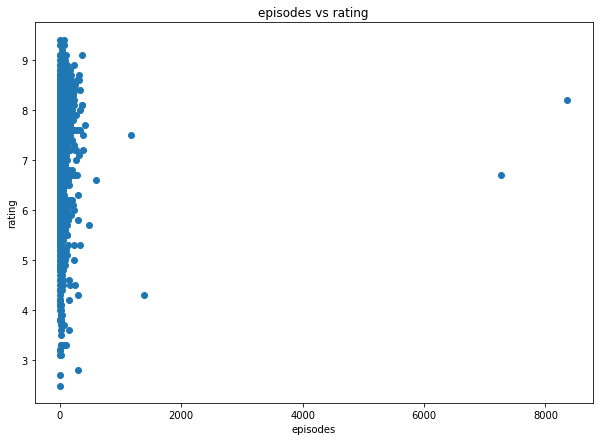

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_raw['episodes'], data_raw['rating'],'o', alpha = 1)
# plt.tick_params(axis='x',labelrotation = 90)
plt.xlabel('episodes')
plt.ylabel('rating')
plt.title('episodes vs rating')
pass

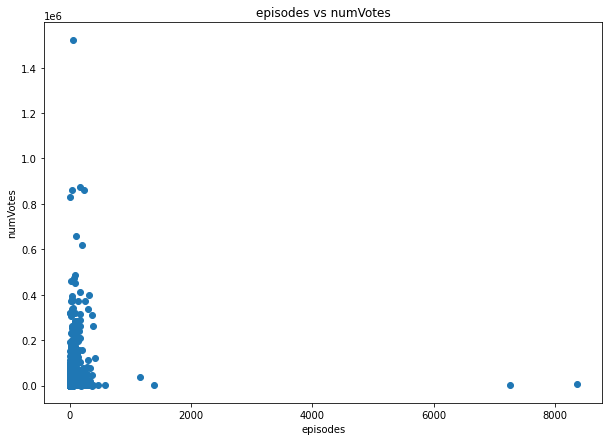

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_raw['episodes'], data_raw['numVotes'],'o', alpha = 1)
# plt.tick_params(axis='x',labelrotation = 90)
plt.xlabel('episodes')
plt.ylabel('numVotes')
plt.title('episodes vs numVotes')
pass

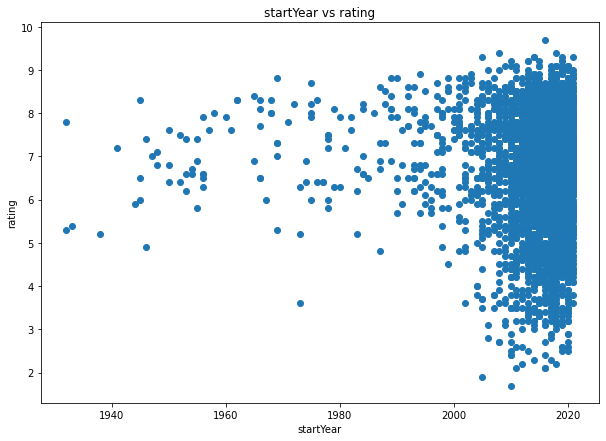

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_raw['startYear'], data_raw['rating'],'o', alpha = 1)
# plt.tick_params(axis='x',labelrotation = 90)
plt.xlabel('startYear')
plt.ylabel('rating')
plt.title('startYear vs rating')
pass

По графикам можно сказать, что гораздо больше голосов отдавали именно за ТВ-сериалы и фильмы с небольшим числом эпизодов.

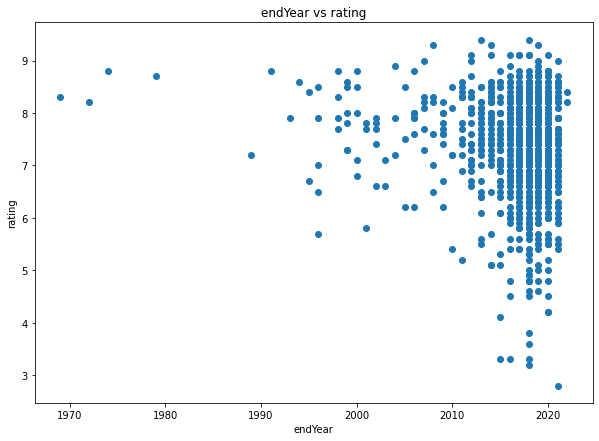

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data_raw['endYear'], data_raw['rating'],'o', alpha = 1)
# plt.tick_params(axis='x',labelrotation = 90)
plt.xlabel('endYear')
plt.ylabel('rating')
plt.title('endYear vs rating')
pass

Посмотрим пропущенные значения

In [ ]:
data_raw.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language            0
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
isAdult             0
cast                0
image_url           0
dtype: int64

В общем по всей таблице

In [ ]:
data_raw.isnull().sum().sum()

18121

Посмотрим строки с пустыми значениями

In [ ]:
data_raw.dropna(axis = 0)

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
5,tt5028002,StartUp,6,18,2016.0,2018.0,30.0,44,tvSeries,United States,English,"A desperate banker, a Haitian-American gang lo...",Miami - A desperate banker needs to conceal st...,8.0,16980.0,"Crime,Thriller",0,"['Adam Brody', 'Edi Gathegi', 'Otmara Marrero'...",https://m.media-amazon.com/images/M/MV5BMTAxNT...
9,tt5774002,Jupiter's Legacy,10,18,2021.0,2021.0,8.0,56,tvSeries,United States,English,The first generation of superheroes has kept t...,The first generation of superheroes kept the w...,6.8,27309.0,"Action,Adventure,Drama",0,"['Josh Duhamel', 'Ben Daniels', 'Leslie Bibb',...",https://m.media-amazon.com/images/M/MV5BMDU4MW...
11,tt1520211,The Walking Dead,12,18+,2010.0,2022.0,177.0,44,tvSeries,United States,English,Sheriff Deputy Rick Grimes wakes up from a com...,Sheriff Deputy Rick Grimes gets shot and falls...,8.2,873752.0,"Drama,Horror,Thriller",0,"['Andrew Lincoln', 'Norman Reedus', 'Melissa M...",https://m.media-amazon.com/images/M/MV5BMTc5Zm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,tt6424452,Oushitsu Kyoushi Heine,"4,424",13,2017.0,2017.0,12.0,25,tvSeries,Japan,English,Heine Wittgenstein is hired as the Royal Tutor...,Heine Wittgenstein is hired as the Royal Tutor...,7.1,164.0,"Adventure,Animation,Comedy",0,"['Yuto Adachi', 'Shouta Aoi', 'Yûya Asato', 'A...",https://m.media-amazon.com/images/M/MV5BOTJmOT...
4393,tt9642576,Regiment Diaries,"4,428",13,2018.0,2019.0,13.0,\N,tvSeries,India,Hindi,The Indian army is a family of several regimen...,The Indian army is a family of several regimen...,8.8,61.0,Documentary,0,-,https://m.media-amazon.com/images/M/MV5BZDlmYT...
4710,tt12875794,La Línea: La Sombra del Narco,"4,748",16,2020.0,2020.0,4.0,\N,tvMiniSeries,Spain,Spanish,"Go inside La Línea, the Spanish beach town tur...","Go inside La Línea, the Spanish beach town tur...",6.4,325.0,"Crime,Documentary",0,['Juan Franco'],https://m.media-amazon.com/images/M/MV5BOTM3Mj...
4858,tt3147968,Cain and Abel,"4,899",18,2009.0,2009.0,20.0,\N,tvSeries,South Korea,Korean,Based on the biblical story of Adam and Eve's ...,Based on the biblical story of Adam and Eve's ...,7.7,225.0,"Action,Drama,Romance",0,"['So Ji-seob', 'Hyeon-jun Shin', 'Han Ji-min',...",https://m.media-amazon.com/images/M/MV5BOWJhYj...


In [ ]:
# Число строк, содержащие пустые значения
7008-495

6513

Предлагаем убрать признаки со слишком большим количеством уникальных значений

In [ ]:
data_raw = data_raw.drop(labels=["title", "summary","plot"], axis=1)
data_raw = data_raw.drop(labels=["imdb_id","cast","image_url"], axis=1)
data_raw = data_raw.drop(labels="popular_rank",axis=1)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   certificate    2409 non-null   object 
 1   startYear      6493 non-null   float64
 2   endYear        1126 non-null   float64
 3   episodes       2304 non-null   float64
 4   runtime        7006 non-null   object 
 5   type           7006 non-null   object 
 6   orign_country  7008 non-null   object 
 7   language       7008 non-null   object 
 8   rating         6000 non-null   float64
 9   numVotes       6000 non-null   float64
 10  genres         7006 non-null   object 
 11  isAdult        7008 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 657.1+ KB


Удалим некоторые столбцы, где пропущенных значений слишком много

In [ ]:
data_raw = data_raw.drop(labels=["endYear", "certificate"], axis=1)
data_raw = data_raw.dropna()
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 0 to 6157
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   startYear      2131 non-null   float64
 1   episodes       2131 non-null   float64
 2   runtime        2131 non-null   object 
 3   type           2131 non-null   object 
 4   orign_country  2131 non-null   object 
 5   language       2131 non-null   object 
 6   rating         2131 non-null   float64
 7   numVotes       2131 non-null   float64
 8   genres         2131 non-null   object 
 9   isAdult        2131 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 183.1+ KB


In [ ]:
data_raw = data_raw.drop(labels="isAdult", axis=1)
data_raw = data_raw.dropna()
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 0 to 6157
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   startYear      2131 non-null   float64
 1   episodes       2131 non-null   float64
 2   runtime        2131 non-null   object 
 3   type           2131 non-null   object 
 4   orign_country  2131 non-null   object 
 5   language       2131 non-null   object 
 6   rating         2131 non-null   float64
 7   numVotes       2131 non-null   float64
 8   genres         2131 non-null   object 
dtypes: float64(4), object(5)
memory usage: 166.5+ KB


Разделим категориальные и числовые признаки

In [ ]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if ((data_raw[c].dtype.name != 'object') )]
print(numerical_columns)
print(categorical_columns)

['startYear', 'episodes', 'rating', 'numVotes']
['runtime', 'type', 'orign_country', 'language', 'genres']


In [ ]:
binary_columns = [c for c in categorical_columns if data_raw.describe(include = [object])[c]['unique'] == 2]
print(binary_columns)

[]


Похоже, что в столбце бинарного типа, как предполагалось изначально, везде только одно значение.

In [ ]:
Runtime = data_raw['runtime'].str.get_dummies()
Type = data_raw['type'].str.get_dummies()
Origin_country = data_raw['orign_country'].str.get_dummies()
Languages = data_raw['language'].str.get_dummies()
Genres = data_raw['genres'].str.get_dummies(",")


In [ ]:
data_nonbinary = pd.concat((Runtime, Type, Origin_country, Genres, Languages), axis = 1)
data_nonbinary

,1,10,100,104,107,11,111,114,115,116,...,Portuguese,Russian,Spanish,Swedish,Tagalog,Tamil,Thai,Turkish,Urdu,Zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6064,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Округлим рейтинг до целого

In [ ]:
data_raw['rating'] = np.round(data_raw['rating'])
data_raw['rating'].describe()

count    2131.000000
mean        7.198029
std         1.078260
min         2.000000
25%         7.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: rating, dtype: float64

In [ ]:
data_numerical = data_raw[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical

,startYear,episodes,rating,numVotes
0,-0.033668,0.209854,0.743764,3.167276
2,0.338077,-0.077390,0.743764,0.123087
3,-4.122871,0.784343,1.671184,11.541734
4,0.709823,-0.117847,0.743764,0.093082
5,-0.033668,-0.045025,0.743764,-0.038862
...,...,...,...,...
5984,-1.148905,-0.134030,-1.111077,-0.271101
6064,-0.591287,-0.113802,0.743764,-0.271498
6071,0.338077,-0.154259,-0.183656,-0.271334
6098,-0.591287,-0.142121,0.743764,-0.271361


Присоединяем даннные

In [ ]:
data_raw = pd.concat((data_numerical, data_nonbinary, data_raw[binary_columns], data_raw["rating"]), axis = 1)

Целевым признаком выберем `rating`

In [ ]:
X = data_raw.drop('rating', axis = 1) 
y = data_raw['rating']

X=X.to_numpy()
y=y.to_numpy()

Поделем на тестовую и обучающую выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

1917 214 (1917, 2) (214, 2)


In [ ]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print("err_train=", err_train)
print("err_test=", err_test)

# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_train, y_train_predict), end="\n\n")
# print(confusion_matrix(y_test, y_test_predict), end="\n\n")

err_train= 0.3268127282211789
err_test= 0.45794392523364486
